In [11]:
import requests
import pandas as pd

In [12]:
url = "https://data.cms.gov/resource/2zuc-y5mm.json?$where=hcpcs_code between '10004' and '69990'&$limit=10000 "
request = requests.get(url)
data = request.json()

In [46]:
#request.text -> give me a string
#request.content -> give me bytes (useful because it helps us pretend we're reading a file)
#request.json -> this content is json and I want you to parse it for me
df = pd.read_json(request.content)

In [21]:
df.head()

,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,place_of_service,number_of_providers,number_of_services,number_of_unique_beneficiary_provider_interactions,number_of_distinct_medicare_beneficiary_per_day_services,average_submitted_charge_amount,average_medicare_allowed_amount,average_medicare_payment_amount,average_medicare_standardized_payment_amount
0,10021,Fine needle aspiration,N,F,2438,6298,5953,6083,386.11,72.02,54.72,54.31
1,10021,Fine needle aspiration,N,O,5411,16088,14265,15415,313.26,120.05,89.58,91.34
2,10022,Fine needle aspiration using imaging guidance,N,F,10899,91016,76735,77793,300.49,67.12,50.94,51.34
3,10022,Fine needle aspiration using imaging guidance,N,O,6701,94543,69814,75462,346.91,140.86,106.71,106.21
4,10030,Fluid collection drainage by catheter using im...,N,F,3723,7723,7134,7422,877.29,152.49,117.78,118.22


In [36]:
df["average_submitted_charge_amount"] > 5000

0       False
1       False
2       False
3       False
4       False
        ...  
7567     True
7568     True
7569     True
7570    False
7571    False
Name: average_submitted_charge_amount, Length: 7572, dtype: bool

## Query

Let's look at ...

In [39]:
df[(df["average_submitted_charge_amount"] > 5000) (df["place_of_service"] == "F")]

,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,place_of_service,number_of_providers,number_of_services,number_of_unique_beneficiary_provider_interactions,number_of_distinct_medicare_beneficiary_per_day_services,average_submitted_charge_amount,average_medicare_allowed_amount,average_medicare_payment_amount,average_medicare_standardized_payment_amount
435,15734,Muscle flap wound repair at trunk,N,F,7007,30256,19463,20174,5539.25,902.71,699.68,650.72
445,15756,Creation of muscle and blood vessel skin graft,N,F,554,1194,1166,1186,10196.56,1933.39,1501.08,1382.95
447,15757,Creation of muscle and blood vessel skin graft,N,F,530,1847,1787,1806,10857.55,1836.05,1428.95,1299.00
448,15758,Creation of muscle and blood vessel skin graft,N,F,272,611,600,600,10779.44,1884.30,1465.35,1375.35
473,15828,"Incision, stretching, and suture of skin",N,F,17,23,21,21,6737.33,1010.06,768.52,733.72
...,...,...,...,...,...,...,...,...,...,...,...,...
7563,69930,Implantation of cochlear device,N,F,509,3909,3855,3909,9064.23,3225.23,2498.46,2537.39
7566,69955,Release of facial nerve,N,F,12,16,16,16,6595.28,1530.03,1068.60,1213.26
7567,69960,Release ear canal,N,F,21,25,25,25,8188.68,1355.00,1059.10,962.43
7568,69970,Removal of growth of temporal bone,N,F,21,26,25,26,7649.44,1831.32,1430.14,1372.77


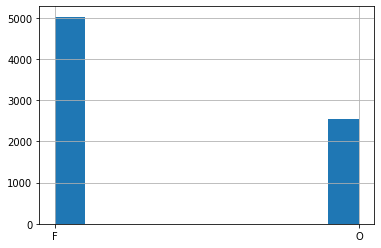

In [45]:
df["place_of_service"].hist()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7572 entries, 0 to 7571
Data columns (total 12 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   hcpcs_code                                                7572 non-null   int64  
 1   hcpcs_description                                         7572 non-null   object 
 2   hcpcs_drug_indicator                                      7572 non-null   object 
 3   place_of_service                                          7572 non-null   object 
 4   number_of_providers                                       7572 non-null   int64  
 5   number_of_services                                        7572 non-null   int64  
 6   number_of_unique_beneficiary_provider_interactions        7572 non-null   int64  
 7   number_of_distinct_medicare_beneficiary_per_day_services  7572 non-null   int64  
 8   average_submitted_

In [26]:
total = 0
for d in data:
    total += int(d["number_of_providers"])
print(total/len(data))

1241.1399894347596


In [28]:
df.describe()

,hcpcs_code,number_of_providers,number_of_services,number_of_unique_beneficiary_provider_interactions,number_of_distinct_medicare_beneficiary_per_day_services,average_submitted_charge_amount,average_medicare_allowed_amount,average_medicare_payment_amount,average_medicare_standardized_payment_amount
count,7572.000000,7572.000000,7.572000e+03,7.572000e+03,7.572000e+03,7572.000000,7572.000000,7572.000000,7572.000000
mean,39127.485473,1241.139989,2.385860e+04,1.320805e+04,2.054954e+04,2400.850228,569.578621,440.077789,440.279414
std,16448.804914,4249.779860,6.332886e+05,2.909985e+05,5.946133e+05,2337.031557,610.200345,476.210835,471.911547
min,10021.000000,1.000000,1.100000e+01,1.100000e+01,1.100000e+01,10.000000,2.410000,1.720000,1.770000
25%,26615.000000,44.000000,6.800000e+01,6.400000e+01,6.600000e+01,884.805000,207.635000,158.315000,159.405000
50%,35668.500000,185.000000,3.270000e+02,3.000000e+02,3.160000e+02,1844.715000,423.135000,325.505000,328.685000
75%,52315.500000,857.250000,1.971000e+03,1.763750e+03,1.875000e+03,3142.257500,738.400000,572.242500,569.342500
max,69990.000000,156854.000000,4.988859e+07,2.376964e+07,4.987053e+07,34919.870000,14881.720000,11614.520000,11537.500000


In [27]:
df["number_of_providers"].max()

156854

In [35]:
df.shape

(7572, 12)

In [34]:
df["hcpcs_description"].nunique()

4310